In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
batch_size = 128
img_height = 200
img_width = 200

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Data_Soil/dataset/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33111 files belonging to 41 classes.
Using 26489 files for training.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Data_Soil/dataset/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,)
 

Found 8339 files belonging to 41 classes.
Using 1667 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Chili__healthy', 'Chili__leaf curl', 'Chili__leaf spot', 'Chili__whitefly', 'Chili__yellowish', 'Coffee__Rust', 'Coffee__healthy', 'Coffee__red spider mite', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

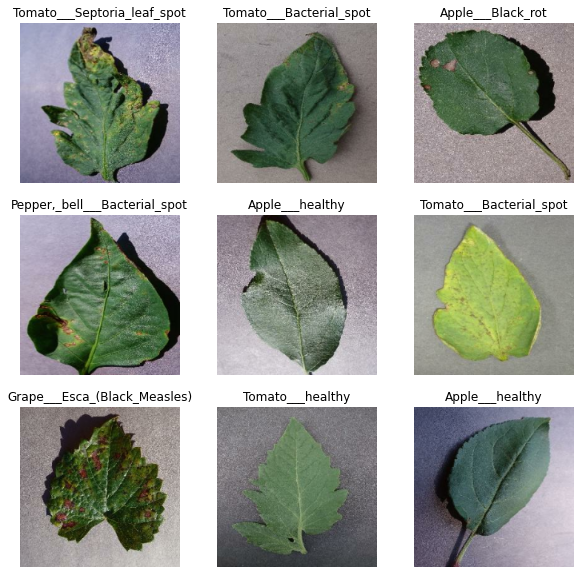

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Chili__healthy', 'Chili__leaf curl', 'Chili__leaf spot', 'Chili__whitefly', 'Chili__yellowish', 'Coffee__Rust', 'Coffee__healthy', 'Coffee__red spider mite', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
num_classes = 41

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3,  activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
metrices = ['accuracy']
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = metrices)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1

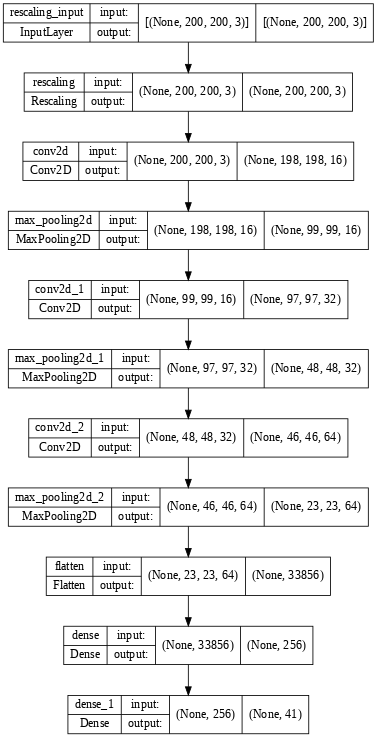

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested = False, dpi=60)

In [ ]:
=epochs=10
history = model.fit(
  train_ds,
  validation_data=test_ds,
  verbose=1,
  epochs=epochs
)

Epoch 1/10
207/207 [==============================] - 106s 485ms/step - loss: 1.4479 - accuracy: 0.5982 - val_loss: 0.8445 - val_accuracy: 0.7397
Epoch 2/10
207/207 [==============================] - 98s 456ms/step - loss: 0.5767 - accuracy: 0.8221 - val_loss: 0.5698 - val_accuracy: 0.8056
Epoch 3/10
207/207 [==============================] - 95s 445ms/step - loss: 0.3566 - accuracy: 0.8873 - val_loss: 0.4234 - val_accuracy: 0.8572
Epoch 4/10
207/207 [==============================] - 95s 444ms/step - loss: 0.2131 - accuracy: 0.9295 - val_loss: 0.4122 - val_accuracy: 0.8728
Epoch 5/10
207/207 [==============================] - 96s 448ms/step - loss: 0.1318 - accuracy: 0.9568 - val_loss: 0.4369 - val_accuracy: 0.8812
Epoch 6/10
207/207 [==============================] - 95s 443ms/step - loss: 0.0831 - accuracy: 0.9735 - val_loss: 0.4305 - val_accuracy: 0.8800
Epoch 7/10
207/207 [==============================] - 95s 446ms/step - loss: 0.0559 - accuracy: 0.9821 - val_loss: 0.4918 - val_a

Text(0.5, 1.0, 'Training and Validation Accuracy')

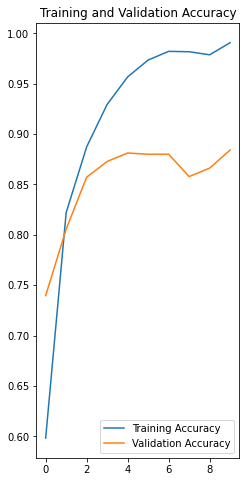

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

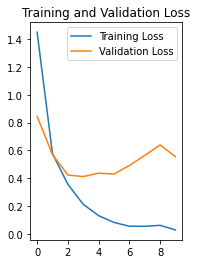

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Simple3LyerModel.hdf5')